The data can be found at: https://www.kaggle.com/currie32/crimes-in-chicago
the .csv's are stored in a separate folder called bigdata_data -> either create a similar folder or alter the paths in the code

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#currently not necessary
import datetime

In [2]:
#paths may differ on your local machine
#error bad lines is necessary because there are some bad lines, however it is not dramatic, because only 3 lines are skipped
crimes01to04 = pd.read_csv('./bigdata_data/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False)
crimes05to07 = pd.read_csv('./bigdata_data/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
crimes08to11 = pd.read_csv('./bigdata_data/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
crimes12to17 = pd.read_csv('./bigdata_data/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\schmids\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
crimes08to11.head()

Unnamed: 0    ID Case Number                    Date                Block  \
0         388  4785    HP610824  10/07/2008 12:39:00 PM      000XX E 75TH ST   
1         835  4786    HP616595  10/09/2008 03:30:00 AM      048XX W POLK ST   
2        1334  4787    HP616904  10/09/2008 08:35:00 AM      030XX W MANN DR   
3        1907  4788    HP618616  10/10/2008 02:33:00 AM  052XX W CHICAGO AVE   
4        2436  4789    HP619020  10/10/2008 12:50:00 PM    026XX S HOMAN AVE   

   IUCR Primary Type          Description Location Description  Arrest  ...  \
0  0110     HOMICIDE  FIRST DEGREE MURDER                ALLEY    True  ...   
1  0110     HOMICIDE  FIRST DEGREE MURDER               STREET    True  ...   
2  0110     HOMICIDE  FIRST DEGREE MURDER        PARK PROPERTY   False  ...   
3  0110     HOMICIDE  FIRST DEGREE MURDER           RESTAURANT   False  ...   
4  0110     HOMICIDE  FIRST DEGREE MURDER               GARAGE   False  ...   

   Ward  Community Area  FBI Code  X Coordinate  Y Coordinate  Year  \
0   6.0            69.0       01A     1178207.0     1855308.0  2008   
1  24.0            25.0       01A     1144200.0     1895857.0  2008   
2  18.0            66.0       01A     1157314.0     1859778.0  2008   
3  37.0            25.0       01A     1141065.0     1904824.0  2008   
4  22.0            30.0       01A     1154123.0     1886297.0  2008   

               Updated On   Latitude  Longitude                       Location  
0  08/17/2015 03:03:40 PM  41.758276 -87.622451  (41.758275857, -87.622451031)  
1  08/17/2015 03:03:40 PM  41.870252 -87.746069   (41.87025207, -87.746069362)  
2  08/17/2015 03:03:40 PM  41.770990 -87.698901  (41.770990476, -87.698901469)  
3  08/17/2015 03:03:40 PM  41.894917 -87.757358  (41.894916924, -87.757358147)  
4  08/17/2015 03:03:40 PM  41.843826 -87.709893  (41.843826272, -87.709893465)  

[5 rows x 23 columns]

In [4]:
#the smaller dataframes get concatenated to one big one ... later this happens when streaming data gets added to the data from
# the data lake
crimes_list = [crimes01to04, crimes05to07, crimes08to11, crimes12to17]
crimes = pd.concat(crimes_list)

In [5]:
#data preparation
crimes['Year'] = crimes['Year'].astype('int')
#in testing we found that there is a faulty line, where the year is specified as 41, this whole line gets deleted,
# because the probability of it beiing a faulty row in general is high and we have enough other entrys
crimes = crimes[crimes.Year != 41]

In [6]:
#currently not needed
#crimes['mmddyyyy'] = crimes['Date'].astype(str).str[0:10].astype(str)
#crimes['mmddyyyy'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y'))

#data preparation
#the month-information gets read from the Date-column
crimes['month'] = crimes['Date'].astype(str).str[0:2].astype(str)

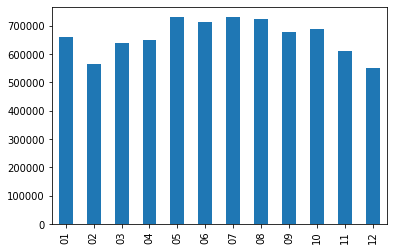

In [7]:
#bar plot that shows, how crime is distributed over the months
crimes['month'].value_counts().sort_index().plot(kind="bar")

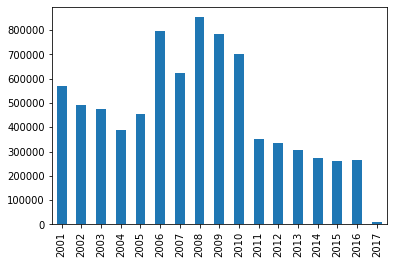

In [8]:
#bar plot that shows, how crime is distributed over the years
crimes['Year'].value_counts().sort_index().plot(kind="bar")

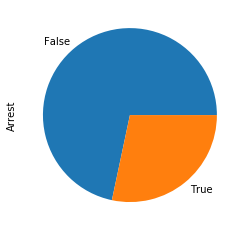

In [9]:
#pie chart that shows the proportion of crime that results in an arrest
crimes['Arrest'].value_counts().sort_index().plot(kind="pie")

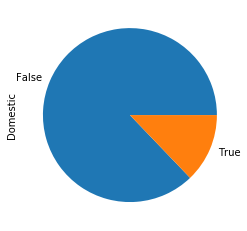

In [10]:
#pie chart that shows the proportion of domestic crime
crimes['Domestic'].value_counts().sort_index().plot(kind="pie")

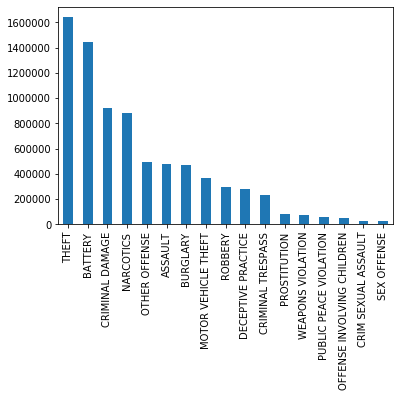

In [11]:
#bar plot that shows, what type of crime is committed most
# 50-percentile is used, so only the types with the highest occurences are shown and not all
crimes['Primary Type'].value_counts()[crimes['Primary Type'].value_counts()> crimes['Primary Type'].value_counts().quantile(0.50)].plot(kind="bar")

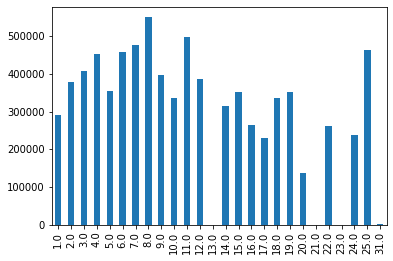

In [12]:
#bar plot that shows, how crime is distributed over the districts
# for whatever reason the column can't be converted to int in a sensible way
crimes['District'].value_counts().sort_index().plot(kind="bar")

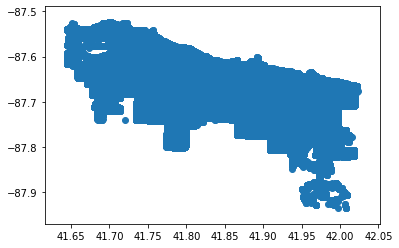

In [13]:
#attempt to visualize, where in the City there is a lot of crime
crimes['Latitude'] = crimes['Latitude'].astype('float')
crimes = crimes[crimes.Latitude > 40]
fig, ax = plt.subplots()
ax.scatter(crimes.Latitude, crimes.Longitude)